In [3]:
import pandas as pd

In [4]:
events = pd.read_csv('data/2021VAERSDATA.csv', encoding="ISO-8859-1", low_memory=False)
vax = pd.read_csv('data/2021VAERSVAX.csv', encoding="ISO-8859-1", low_memory=False)

We need to join the two tables.

In [5]:
# Focus on COVID19 vaccines
data = pd.merge(events, vax[vax.VAX_NAME.str.startswith("COVID19")], how='left', left_on='VAERS_ID', right_on='VAERS_ID')
# and deaths
data = data[data.DIED == 'Y' ]

After the join above, we end up with many duplicates when someone died after dose 2 and the dose 1 was also input in VAERSVAX:

In [6]:
data[data.duplicated(['VAERS_ID',], keep=False)]

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX    RPT_DATE  \
29458     944595  01/14/2021    FL     56.0     56.0      NaN   M         NaN   
29459     944595  01/14/2021    FL     56.0     56.0      NaN   M         NaN   
30654    1349910  01/14/2021    KS     85.0     85.0      NaN   M  01/08/2021   
30655    1349910  01/14/2021    KS     85.0     85.0      NaN   M  01/08/2021   
33164     948418  01/15/2021    CO     37.0     37.0      NaN   F         NaN   
...          ...         ...   ...      ...      ...      ...  ..         ...   
633366   1769008  10/07/2021    TX     74.0     74.0      NaN   M         NaN   
633370   1769012  10/07/2021    TX     81.0     81.0      NaN   F         NaN   
633371   1769012  10/07/2021    TX     81.0     81.0      NaN   F         NaN   
633394   1769037  10/07/2021    TX     91.0     90.0      NaN   M         NaN   
633395   1769037  10/07/2021    TX     91.0     90.0      NaN   M         NaN   

                                             SYMPTOM_TEXT DIED  ... OFC_VISIT  \
29458   Cardiac arrest within 1 hour  Patient had the ...    Y  ...       NaN   
29459   Cardiac arrest within 1 hour  Patient had the ...    Y  ...       NaN   
30654                                   Symptoms: & Death    Y  ...       NaN   
30655                                   Symptoms: & Death    Y  ...       NaN   
33164        Expired on 1/12/2021; unknown cause of death    Y  ...       NaN   
...                                                   ...  ...  ...       ...   
633366  Pfizer BioNTech COVID-19 Vaccine EUA: COVID-19...    Y  ...       NaN   
633370  Pfizer BioNTech COVID-19 Vaccine EUA: COVID-19...    Y  ...         Y   
633371  Pfizer BioNTech COVID-19 Vaccine EUA: COVID-19...    Y  ...         Y   
633394  Pfizer BioNTech COVID-19 Vaccine EUA: COVID-19...    Y  ...       NaN   
633395  Pfizer BioNTech COVID-19 Vaccine EUA: COVID-19...    Y  ...       NaN   

       ER_ED_VISIT           ALLERGIES VAX_TYPE         VAX_MANU  VAX_LOT  \
29458            Y                nkda  COVID19  PFIZER\BIONTECH   EL3302   
29459            Y                nkda  COVID19  PFIZER\BIONTECH   EL0140   
30654          NaN                 NaN  COVID19          MODERNA  039K20A   
30655          NaN                 NaN  COVID19          MODERNA  039K20A   
33164          NaN            No known  COVID19  PFIZER\BIONTECH   EK5730   
...            ...                 ...      ...              ...      ...   
633366           Y                NKDA  COVID19  PFIZER\BIONTECH   EP6955   
633370           Y  No known allergies  COVID19  PFIZER\BIONTECH   EL9266   
633371           Y  No known allergies  COVID19  PFIZER\BIONTECH   ER8733   
633394           Y  No known allergies  COVID19  PFIZER\BIONTECH   EL0142   
633395           Y  No known allergies  COVID19  PFIZER\BIONTECH   EJ1686   

       VAX_DOSE_SERIES VAX_ROUTE VAX_SITE                             VAX_NAME  
29458                2        IM       AR  COVID19 (COVID19 (PFIZER-BIONTECH))  
29459                1        IM       AR  COVID19 (COVID19 (PFIZER-BIONTECH))  
30654                2       NaN       LA          COVID19 (COVID19 (MODERNA))  
30655                2       NaN       LA          COVID19 (COVID19 (MODERNA))  
33164              UNK        IM       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  
...                ...       ...      ...                                  ...  
633366               2        IM       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  
633370               1        IM       UN  COVID19 (COVID19 (PFIZER-BIONTECH))  
633371               2        IM       UN  COVID19 (COVID19 (PFIZER-BIONTECH))  
633394               1        IM       RA  COVID19 (COVID19 (PFIZER-BIONTECH))  
633395               2        IM       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  

[2214 rows x 42 columns]

In that case, we remove dose 1 by first sorting by VAX_DOSE_SERIES, then use drop_duplicates on VAERS_ID.

In [7]:
data.sort_values(['VAERS_ID', 'VAX_DOSE_SERIES'], inplace=True)
data.drop_duplicates('VAERS_ID', inplace=True, keep='last')

This is the final data.

In [8]:
data

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
198       916803  01/01/2021    LA     78.0     78.0      NaN   M      NaN   
506       917117  01/01/2021    AR     82.0     82.0      NaN   M      NaN   
1289      917790  01/03/2021    AR     90.0     90.0      NaN   F      NaN   
1292      917793  01/03/2021    AR     78.0     78.0      NaN   F      NaN   
1560      918065  01/04/2021    CA     64.0     64.0      NaN   M      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
633868   1770622  10/08/2021    WA     83.0      NaN      NaN   M      NaN   
633870   1770624  10/08/2021    MO     67.0      NaN      NaN   M      NaN   
633871   1770625  10/08/2021    CA     37.0      NaN      NaN   F      NaN   
634221   1771072  10/08/2021   NaN      NaN      NaN      NaN   F      NaN   
634222   1771073  10/08/2021    VA     69.0      NaN      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED  ... OFC_VISIT  \
198                                      respitory colase    Y  ...       NaN   
506     After vaccination, patient tested positive for...    Y  ...       NaN   
1289    At the time of vaccination, there was an outbr...    Y  ...       NaN   
1292    Prior to the administration of the COVID 19 va...    Y  ...       NaN   
1560    1/1/2020: Residents was found unresponsive. Pr...    Y  ...       NaN   
...                                                   ...  ...  ...       ...   
633868  Pneumonia; COVID-19; COVID-19; This is a spont...    Y  ...       NaN   
633870  Death; This is a spontaneous report from a con...    Y  ...       NaN   
633871  died; This is a spontaneous report from a cont...    Y  ...       NaN   
634221  BLOOD CLOT; This spontaneous report received f...    Y  ...       NaN   
634222  DEATH; LOW BLOOD PRESSURE; This spontaneous re...    Y  ...       NaN   

       ER_ED_VISIT               ALLERGIES VAX_TYPE         VAX_MANU  \
198            NaN                     N?A      NaN              NaN   
506            NaN                    None  COVID19          MODERNA   
1289           NaN                    None  COVID19          MODERNA   
1292           NaN                    None  COVID19          MODERNA   
1560           NaN  - Clozaril  - Tegretol  COVID19          MODERNA   
...            ...                     ...      ...              ...   
633868           Y                     NaN  COVID19  PFIZER\BIONTECH   
633870         NaN                     NaN  COVID19  PFIZER\BIONTECH   
633871         NaN                     NaN  COVID19  PFIZER\BIONTECH   
634221         NaN                     NaN  COVID19          JANSSEN   
634222         NaN                     NaN  COVID19          JANSSEN   

          VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
198           NaN             NaN       NaN      NaN   
506           NaN               1        IM       AR   
1289          NaN               1        IM       AR   
1292          NaN               1        IM       AR   
1560    025J20-2A               1        IM      NaN   
...           ...             ...       ...      ...   
633868        NaN               2       NaN       LA   
633870        NaN             UNK       NaN       RA   
633871     FK0112             UNK       NaN      NaN   
634221    Unknown             UNK       NaN      NaN   
634222    1821288             UNK       NaN      NaN   

                                   VAX_NAME  
198                                     NaN  
506             COVID19 (COVID19 (MODERNA))  
1289            COVID19 (COVID19 (MODERNA))  
1292            COVID19 (COVID19 (MODERNA))  
1560            COVID19 (COVID19 (MODERNA))  
...                                     ...  
633868  COVID19 (COVID19 (PFIZER-BIONTECH))  
633870  COVID19 (COVID19 (PFIZER-BIONTECH))  
633871  COVID19 (COVID19 (PFIZER-BIONTECH))  
634221          COVID19 (COVID19 (JANSSEN))  
634222          COVID19 (COVID19 (JANSSEN))  

[7896 r

Here we define wrappers for different vaccines.

In [26]:
from vaersutils.vaersutils import Injection

Pfizer1 = Injection(data, "Pfizer (D1)", 'VAX_NAME == "COVID19 (COVID19 (PFIZER-BIONTECH))" and VAX_DOSE_SERIES == "1"')
Pfizer2 = Injection(data, "Pfizer (D2)", 'VAX_NAME == "COVID19 (COVID19 (PFIZER-BIONTECH))" and VAX_DOSE_SERIES == "2"')
Moderna1 = Injection(data, "Moderna (D1)", 'VAX_NAME == "COVID19 (COVID19 (MODERNA))" and VAX_DOSE_SERIES == "1"')
Moderna2 = Injection(data, "Moderna (D2)", 'VAX_NAME == "COVID19 (COVID19 (MODERNA))" and VAX_DOSE_SERIES == "2"')
Janssen = Injection(data, "Janssen", 'VAX_NAME == "COVID19 (COVID19 (JANSSEN))" and VAERS_ID != 1215401')

We're now able to use it like this:

In [27]:
Pfizer1.table(age_min=12, age_max=75)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
1849      918388  01/04/2021    FL     65.0     65.0      NaN   F      NaN   
1879      918418  01/04/2021    FL     65.0     65.0      NaN   M      NaN   
4848      921667  01/05/2021    OH     39.0     39.0      NaN   F      NaN   
4949      921768  01/05/2021    WA     58.0     58.0      NaN   F      NaN   
9412      926269  01/07/2021    MD     74.0     74.0      NaN   M      NaN   
...          ...         ...   ...      ...      ...      ...  ..      ...   
619510   1745749  09/29/2021    WA     73.0     73.0      NaN   F      NaN   
627790   1759807  10/04/2021    MS     68.0     68.0      NaN   M      NaN   
627982   1760635  10/04/2021    AZ     22.0     22.0      NaN   F      NaN   
629446   1762881  10/05/2021    CA     46.0     46.0      NaN   M      NaN   
630989   1765464  10/06/2021    SC     74.0     74.0      NaN   F      NaN   

                                             SYMPTOM_TEXT DIED  ...  \
1849    Resident found unresponsive without pulse, res...    Y  ...   
1879    Resident became SOB, congested and hypoxic req...    Y  ...   
4848    LTCF Pfizer Vaccine clinic conducted 12/29/202...    Y  ...   
4949    Vaccine received at about 0900 on 01/04/2021 a...    Y  ...   
9412    Pt last seen at 1200 by nurse for ID band chec...    Y  ...   
...                                                   ...  ...  ...   
619510  After first dose patient hospitalized for RDS/...    Y  ...   
627790  Patient died suddenly at approximately 6AM on ...    Y  ...   
627982      Death. My daughter passed away in her sleep .    Y  ...   
629446          Death within 7 days of receiving vaccine.    Y  ...   
630989  Immediate rash and swelling in groin and upper...    Y  ...   

       ER_ED_VISIT           ALLERGIES VAX_TYPE         VAX_MANU      VAX_LOT  \
1849           NaN                 NKA  COVID19  PFIZER\BIONTECH       EL0140   
1879           NaN                 NKA  COVID19  PFIZER\BIONTECH       EL0140   
4848           NaN                 NaN  COVID19  PFIZER\BIONTECH       EL0140   
4949           NaN          None Known  COVID19  PFIZER\BIONTECH       EL0140   
9412           NaN  No Known Allergies  COVID19  PFIZER\BIONTECH       El0140   
...            ...                 ...      ...              ...          ...   
619510           Y                none  COVID19  PFIZER\BIONTECH  unknown1111   
627790         NaN                None  COVID19  PFIZER\BIONTECH          NaN   
627982         NaN                None  COVID19  PFIZER\BIONTECH       Er8734   
629446         NaN                 NaN  COVID19  PFIZER\BIONTECH       EN6200   
630989         NaN          Penicillin  COVID19  PFIZER\BIONTECH       ER8733   

       VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
1849                 1        IM       LA   
1879                 1        IM       RA   
4848                 1        IM       LA   
4949                 1        IM       UN   
9412                 1        IM       LA   
...                ...       ...      ...   
619510               1        IM       RA   
627790               1        IM       LA   
627982               1       SYR       UN   
629446               1        IM      NaN   
630989               1        IM       AR   

                                   VAX_NAME    injection  
1849    COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
1879    COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
4848    COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
4949    COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
9412    COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
...                                     ...          ...  
619510  COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
627790  COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
627982  COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
629446  COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1)  
630989  COVID19 (COVID19 (PFIZER-BIONTECH))  Pfizer (D1

In [11]:
from vaersutils.vaersutils import plot_hists, plot_chart


Are reported deaths in VAERS coincidental?
According to [REUTERS fact checking](https://www.reuters.com/article/factcheck-covid19-vaers-idUSL1N2PB2H3)
> Claims of widespread death due to COVID-19 vaccines reported on VAERS are false. Entries in VAERS do not prove causality. According to the CDC, there have been three confirmed deaths connected to the Janssen COVID-19 vaccine.

The idea is that the reported deaths are purely coincidental, and totally unrelated to the injections.

If this is 100% true (ie the "death" events and the "injection" events are not related), the distribution of deaths should be identical in any subset of the data.


Let's first plot the histograms and find out what the distribution of reported deaths looks like.

We'll use the age and the number of days between injection and death.

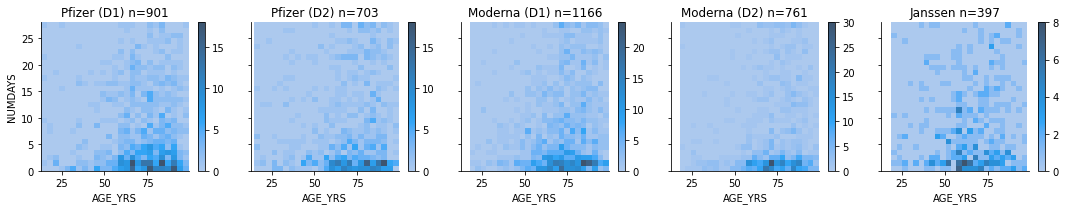

In [12]:
p = plot_hists([Pfizer1, Pfizer2, Moderna1, Moderna2, Janssen])

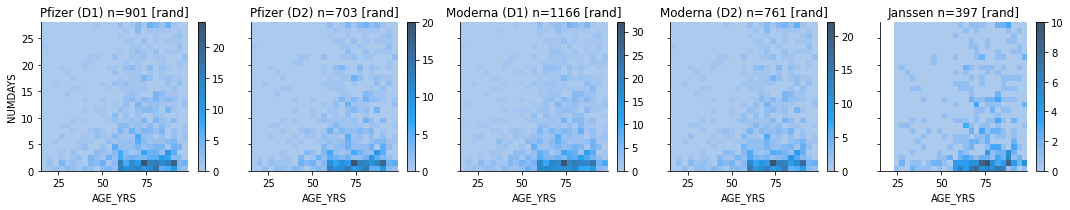

In [13]:
p = plot_hists([Pfizer1, Pfizer2, Moderna1, Moderna2, Janssen], randomize=12345)

This is how we can check if we have duplicated data for some column:

In [14]:
data[(data.VAX_MANU == 'MODERNA') & (data.AGE_YRS > 65) & (data.AGE_YRS < 80) & (data.NUMDAYS < 5)][data.duplicated(['SYMPTOM_TEXT'], keep=False)]

/tmp/ipykernel_2738/3617792740.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.VAX_MANU == 'MODERNA') & (data.AGE_YRS > 65) & (data.AGE_YRS < 80) & (data.NUMDAYS < 5)][data.duplicated(['SYMPTOM_TEXT'], keep=False)]


VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
72868     992347  02/01/2021    OK     78.0     78.0      NaN   M      NaN   
83872    1006289  02/05/2021    GA     75.0     75.0      NaN   M      NaN   
83886    1006303  02/05/2021    GA     67.0     67.0      NaN   M      NaN   
101665   1027757  02/13/2021    PA     77.0     77.0      NaN   F      NaN   
103327   1029412  02/14/2021    NY     69.0     69.0      NaN   M      NaN   
131461   1064265  03/01/2021    AR     77.0     77.0      NaN   M      NaN   
131631   1064433  03/01/2021    AL     72.0     72.0      NaN   M      NaN   
145980   1082759  03/08/2021    VA     79.0     79.0      NaN   M      NaN   
154569   1092651  03/11/2021    CA     77.0     77.0      NaN   M      NaN   
156994   1095393  03/12/2021    WY     76.0     76.0      NaN   M      NaN   
157007   1095406  03/12/2021   NaN     79.0     79.0      NaN   M      NaN   
210722   1158955  04/02/2021    PA     71.0     71.0      NaN   F      NaN   
240521   1192987  04/11/2021    FL     69.0     69.0      NaN   M      NaN   
236562   1197397  04/09/2021   NaN     73.0     72.0      NaN   M      NaN   
245283   1198028  04/12/2021    MI     75.0     76.0      NaN   M      NaN   
251424   1204876  04/13/2021    MI     66.0     66.0      NaN   M      NaN   
263680   1218779  04/16/2021    MD     78.0     78.0      NaN   F      NaN   
288614   1247318  04/23/2021    NE     69.0     69.0      NaN   F      NaN   
354330   1327132  05/18/2021    NY     68.0     68.0      NaN   M      NaN   
371190   1351556  05/26/2021    MN     74.0     74.0      NaN   M      NaN   
421749   1431211  06/28/2021    KS     67.0     67.0      NaN   M      NaN   
432545   1454169  07/07/2021    NJ     75.0     75.0      NaN   F      NaN   
589167   1694281  09/13/2021    TX     74.0     74.0      NaN   M      NaN   
603943   1719493  09/21/2021   NaN     74.0     74.0      NaN   M      NaN   

                                             SYMPTOM_TEXT DIED  ... OFC_VISIT  \
72868                                               Death    Y  ...       NaN   
83872                                     death- 2/1/2021    Y  ...       NaN   
83886                                     death- 2/1/2021    Y  ...       NaN   
101665                                              Death    Y  ...       NaN   
103327                                              Death    Y  ...       NaN   
131461                                              Death    Y  ...       NaN   
131631                                     Cardiac Arrest    Y  ...       NaN   
145980                                              Death    Y  ...       NaN   
154569                                              DEATH    Y  ...       NaN   
156994                                     Cardiac Arrest    Y  ...       NaN   
157007                                              death    Y  ...       NaN   
210722                                           Deceased    Y  ...       NaN   
240521                                              Death    Y  ...       NaN   
236562                                   Death Narrative:    Y  ...         Y   
245283                                       None stated.    Y  ...         Y   
251424                                              Death    Y  ...       NaN   
263680                                              Death    Y  ...       NaN   
288614                                              Death    Y  ...       NaN   
354330                                     Cardiac Arrest    Y  ...       NaN   
371190  Patient was hospitalized multiple times and di...    Y  ...       NaN   
421749                                       Sudden Death    Y  ...       NaN   
432545                                              Death    Y  ...         Y   
589167                                              death    Y  ...       NaN   
603943                                       Sudden death    Y  ...       NaN   

       ER_ED_VISIT             

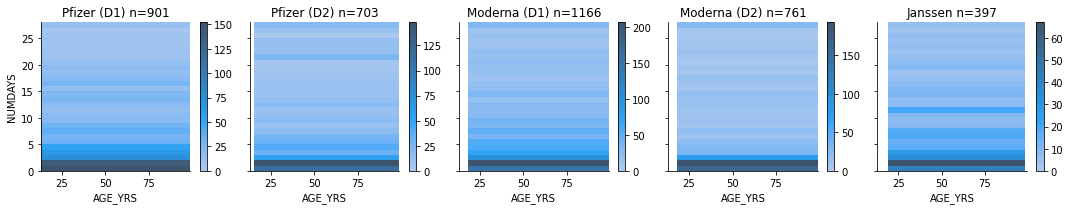

In [15]:
plot_hists([Pfizer1, Pfizer2, Moderna1, Moderna2, Janssen], bins=(1, 28))

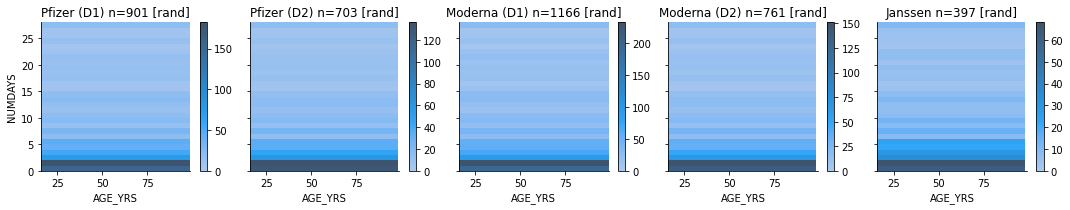

In [16]:
plot_hists([Pfizer1, Pfizer2, Moderna1, Moderna2, Janssen], bins=(1, 28), randomize=1)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS)'}, xlabel='age', ylabel='median'>

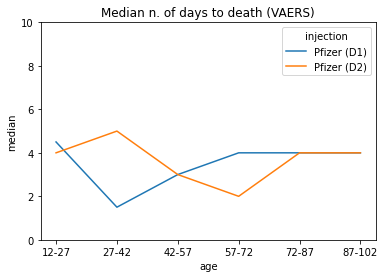

In [17]:
plot_chart([Pfizer1, Pfizer2], groups=6)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS) [rand]'}, xlabel='age', ylabel='median'>

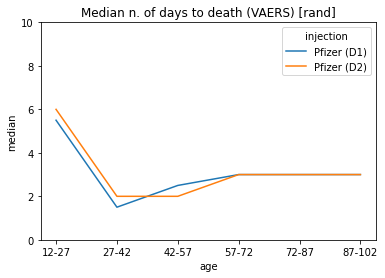

In [18]:
plot_chart([Pfizer1, Pfizer2], groups=6, randomize=1)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS)'}, xlabel='age', ylabel='median'>

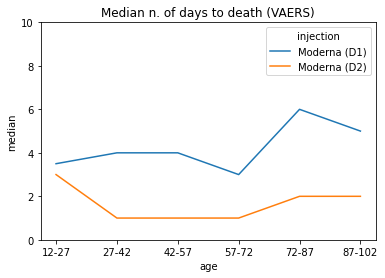

In [19]:
plot_chart([Moderna1, Moderna2], groups=6)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS) [rand]'}, xlabel='age', ylabel='median'>

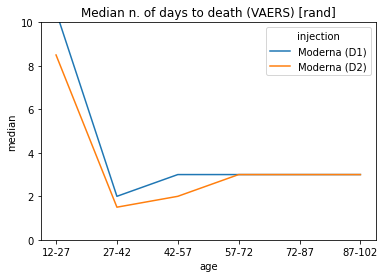

In [20]:
plot_chart([Moderna1, Moderna2], groups=6, randomize=1)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS)'}, xlabel='age', ylabel='median'>

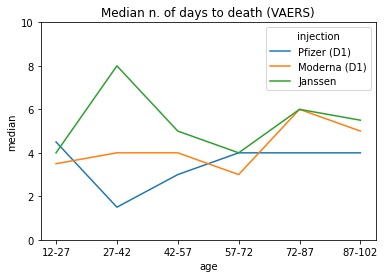

In [21]:
plot_chart([Pfizer1, Moderna1, Janssen], groups=6)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS)'}, xlabel='age', ylabel='median'>

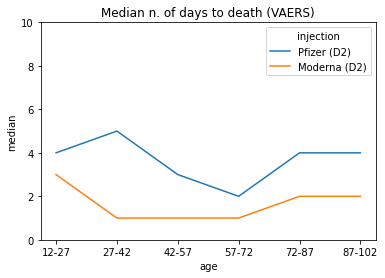

In [22]:
plot_chart([Pfizer2, Moderna2], groups=6)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS)'}, xlabel='age', ylabel='median'>

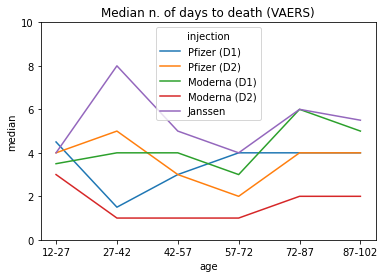

In [23]:
plot_chart([Pfizer1, Pfizer2, Moderna1, Moderna2, Janssen], groups=6)

<AxesSubplot:title={'center':'Median n. of days to death (VAERS) [rand]'}, xlabel='age', ylabel='median'>

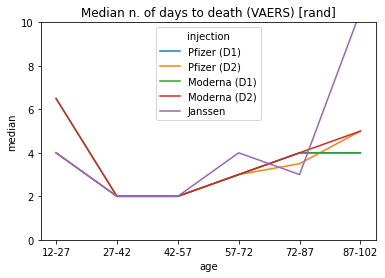

In [24]:
plot_chart([Pfizer1, Pfizer2, Moderna1, Moderna2, Janssen], groups=6, randomize=2)